# Feature Engineering on Numeric Data

Numeric data usually represents data in the form of scalar values ​​that describe observations, records, or measurements. Here, with the word numeric data, we need to understand that it is continuous data, not discrete data that is often considered as categorical data.

Numeric data can also be represented as vectors of values, where each value or entity in the vector can represent a specific feature. Intergers and Floats are the most common types of numeric data and are often used for continuous numeric data.

Although numeric data is a type of data that can be directly fed into machine learning models. However, it is still necessary to design features that are relevant to the scenario, problem to be solved, and the domain of the problem. And now, we will use python to build some feature engineering methods with continuous numeric data.

## Understanding Features

A feature is typically a specific representation on top of raw data, which is an individual, measurable attribute, typically depicted by a column in a dataset. Considering a generic two-dimensional dataset, each observation is depicted by a row and each feature by a column, which will have a specific value for an observation.

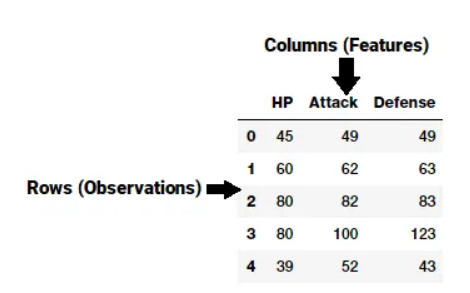

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as spstats
%matplotlib inline

Thus like in the example in the figure above, each row typically indicates a feature vector and the entire set of features across all the observations forms a two-dimensional feature matrix also known as a feature-set.

This is akin to data frames or spreadsheets representing two-dimensional data. Typically machine learning algorithms work with these numeric matrices or tensors and hence most feature engineering techniques deal with converting raw data into some numeric representations which can be easily understood by these algorithms.

Features can be of two major types based on the dataset. Inherent **raw features** are obtained directly from the dataset with no extra data manipulation or engineering. ***Derived features*** are usually obtained from feature engineering, where we extract features from existing data attributes.

## Raw Features

Raw numeric data can often be fed directly to machine learning models based on the context and data format. Raw measures are typically indicated using numeric variables directly as features without any form of transformation or engineering. Typically these features can indicate values or counts

In [3]:
poke_df = pd.read_csv('Pokemon.csv', encoding='utf-8') 
poke_df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


Thus, you can directly use these attributes as features which are depicted in the above data frame. These include each Pokémon’s HP (Hit Points), Attack and Defense stats. In fact, we can also compute some basic statistical measures on these fields.

In [4]:
poke_df[['HP', 'Attack', 'Defense']].describe()

,HP,Attack,Defense
count,800.000000,800.000000,800.000000
mean,69.258750,79.001250,73.842500
std,25.534669,32.457366,31.183501
min,1.000000,5.000000,5.000000
25%,50.000000,55.000000,50.000000
50%,65.000000,75.000000,70.000000
75%,80.000000,100.000000,90.000000
max,255.000000,190.000000,230.000000


With this you can get a good idea about statistical measures in these features like count, average, standard deviation and quartiles.

## Count

Another form of raw measures include features which represent frequencies, counts or occurrences of specific attributes. I'll using top 30 spotify songs dataset to demonstrate this.

In [10]:
spotify_df = pd.read_csv('spotify-2023.csv', encoding = 'ISO-8859-1')
spotify_df.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


# Binarization

Often raw frequencies or counts may not be relevant for building a model based on the problem which is being solved. For instance if I’m building a recommendation system for song recommendations, I would just want to know if a person is interested or has listened to a particular song by the speed (bpm). This doesn’t require the number of times a song has been listened to since I am more concerned about the various songs he\she has listened to. In this case, a binary feature is preferred as opposed to a count based feature.

In [13]:
from sklearn.preprocessing import Binarizer

bn = Binarizer(threshold=100)
pd_watched = bn.transform([spotify_df['bpm']])[0]
spotify_df['pd_watched'] = pd_watched
spotify_df.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,pd_watched
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,B,Major,80,89,83,31,0,8,4,1
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,C#,Major,71,61,74,7,0,10,4,0
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,F,Major,51,32,53,17,0,31,6,1
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,A,Major,55,58,72,11,0,11,15,1
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,A,Minor,65,23,80,14,63,11,6,1


## Rounding

Often when dealing with continuous numeric attributes like proportions or percentages, we may not need the raw values having a high amount of precision. Hence it often makes sense to round off these high precision percentages into numeric integers. These integers can then be directly used as raw values or even as categorical (discrete-class based) features.

In the last 7 columns of spotify dataset, we have some features that are in percentage form (in normal scale 0 to 100)

## Interactions

Supervised machine learning models usually try to model the output responses (discrete classes or continuous values) as a function of the input feature variables. For example, a simple linear regression equation can be depicted as:

$$y = w_1x_1 + w_2x_2 + w_3x_3 + ... + w_nx_n + b$$

where the input features are depicted by variables: $x_1, x_2, x_3, ..., x_n$ and the weights associated with these features are depicted by $w_1, w_2, w_3, ..., w_n$ and $b$ is the bias term.

In this case, this simple linear model depicts the relationship between the output and inputs, purely based on the individual, separate input features.

Let’s try engineering some interaction features on our Pokémon dataset now.

In [14]:
atk_def = poke_df[['Attack', 'Defense']]
atk_def.head()

,Attack,Defense
0,49,49
1,62,63
2,82,83
3,100,123
4,52,43


In [15]:
from sklearn.preprocessing import PolynomialFeatures
pf = PolynomialFeatures(degree = 2, interaction_only = False, include_bias = False)
res = pf.fit_transform(atk_def)
res

array([[   49.,    49.,  2401.,  2401.,  2401.],
       [   62.,    63.,  3844.,  3906.,  3969.],
       [   82.,    83.,  6724.,  6806.,  6889.],
       ...,
       [  110.,    60., 12100.,  6600.,  3600.],
       [  160.,    60., 25600.,  9600.,  3600.],
       [  110.,   120., 12100., 13200., 14400.]])

The above feature matrix depicts a total of five features including the new interaction features. We can see the degree of each feature in the above matrix as follows.

In [16]:
pd.DataFrame(pf.powers_, columns=['Attack_degree', 'Defense_degree'])

,Attack_degree,Defense_degree
0,1,0
1,0,1
2,2,0
3,1,1
4,0,2


Looking at this output, we now know what each feature actually represents from the degrees depicted here. Armed with this knowledge, we can assign a name to each feature now as follows. This is just for ease of understanding and you should name your features with better, easy to access and simple names.

In [17]:
intr_features = pd.DataFrame(res, columns=['Attack', 'Defense', 'Attack^2', 'Attack x Defense', 'Defense^2'])
intr_features.head(5)

,Attack,Defense,Attack^2,Attack x Defense,Defense^2
0,49.0,49.0,2401.0,2401.0,2401.0
1,62.0,63.0,3844.0,3906.0,3969.0
2,82.0,83.0,6724.0,6806.0,6889.0
3,100.0,123.0,10000.0,12300.0,15129.0
4,52.0,43.0,2704.0,2236.0,1849.0


Thus the above data frame represents our original features along with their interaction features.

## Binning

The problem of working with raw, continuous numeric features is that often the distribution of values in these features will be skewed. This signifies that some values will occur quite frequently while some will be quite rare. Besides this, there is also another problem of the varying range of values in any of these features.

For instance view counts of specific music videos could be abnormally large (Despacito we’re looking at you!) and some could be really small. Directly using these features can cause a lot of issues and adversely affect the model.

Hence there are strategies to deal with this, which include binning and transformations.

Binning, also known as quantization is used for transforming continuous numeric features into discrete ones (categories). These discrete values or numbers can be thought of as categories or bins into which the raw, continuous numeric values are binned or grouped into.

Each bin represents a specific degree of intensity and hence a specific range of continuous numeric values fall into it. Specific strategies of binning data include fixed-width and adaptive binning. Let’s use a subset of data from a dataset extracted from the 2016 FreeCodeCamp Developer\Coder survey which talks about various attributes pertaining to coders and software developers.

In [23]:
fcc = pd.read_csv('2016-FCC-New-Coders-Survey-Data.csv') # Some columns are omitted
fcc[['ID.x', 'EmploymentField', 'Age', 'Income']].head()

C:\Users\nguye\AppData\Local\Temp\ipykernel_16156\1010593145.py:1: DtypeWarning: Columns (21,57) have mixed types. Specify dtype option on import or set low_memory=False.
  fcc = pd.read_csv('2016-FCC-New-Coders-Survey-Data.csv')


,ID.x,EmploymentField,Age,Income
0,cef35615d61b202f1dc794ef2746df14,office and administrative support,28.0,32000.0
1,323e5a113644d18185c743c241407754,food and beverage,22.0,15000.0
2,b29a1027e5cd062e654a63764157461d,finance,19.0,48000.0
3,04a11e4bcb573a1261eb0d9948d32637,"arts, entertainment, sports, or media",26.0,43000.0
4,9368291c93d5d5f5c8cdb1a575e18bec,education,20.0,6000.0


The `ID.x` variable is basically a unique identifier for each coder\developer who took the survey and the other fields are pretty self-explanatory.

## Fixed-Width Binning

Just like the name indicates, in fixed-width binning, we have specific fixed widths for each of the bins which are usually pre-defined by the user analyzing the data. Each bin has a pre-fixed range of values which should be assigned to that bin on the basis of some domain knowledge, rules or constraints. Binning based on rounding is one of the ways, where you can use the rounding operation which we discussed earlier to bin raw values.

Let’s now consider the `Age` feature from the coder survey dataset and look at its distribution.

Text(0, 0.5, 'Frequency')

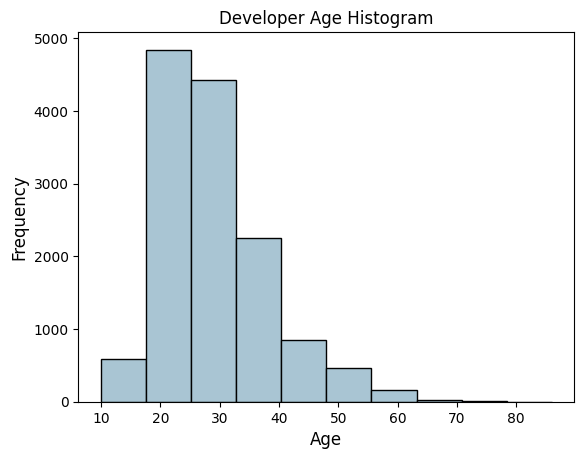

In [25]:
fig, ax = plt.subplots()
fcc['Age'].hist(color = '#A9C5D3', edgecolor = 'black', grid = False)
ax.set_title('Developer Age Histogram', fontsize = 12)
ax.set_xlabel('Age', fontsize = 12)
ax.set_ylabel('Frequency', fontsize = 12)

The above histogram depicting developer ages is slightly right skewed as expected (lesser aged developers). We will now assign these raw age values into specific bins based on the following scheme

```
Age Range: Bin
---------------
 0 -  9  : 0
10 - 19  : 1
20 - 29  : 2
30 - 39  : 3
40 - 49  : 4
50 - 59  : 5
60 - 69  : 6
  ... and so on
```

We can easily do this using what we learnt in the Rounding section earlier where we round off these raw age values by taking the floor value after dividing it by 10.

In [26]:
fcc['Age_bin_round'] = np.array(np.floor(np.array(fcc['Age']) / 10.))
fcc[['ID.x', 'Age', 'Age_bin_round']].iloc[1071:1076]

,ID.x,Age,Age_bin_round
1071,6a02aa4618c99fdb3e24de522a099431,17.0,1.0
1072,f0e5e47278c5f248fe861c5f7214c07a,38.0,3.0
1073,6e14f6d0779b7e424fa3fdd9e4bd3bf9,21.0,2.0
1074,c2654c07dc929cdf3dad4d1aec4ffbb3,53.0,5.0
1075,f07449fc9339b2e57703ec7886232523,35.0,3.0


You can see the corresponding bins for each age have been assigned based on rounding. But what if we need more flexibility? What if we want to decide and fix the bin widths based on our own rules\logic?

Binning based on custom ranges will help us achieve this. Let’s define some custom age ranges for binning developer ages using the following scheme.

```
Age Range : Bin
---------------
 0 -  15  : 1
16 -  30  : 2
31 -  45  : 3
46 -  60  : 4
61 -  75  : 5
75 - 100  : 6
```

Based on this custom binning scheme, we will now label the bins for each developer age value and we will store both the bin range as well as the corresponding label.

In [28]:
bin_ranges = [0, 15, 30, 45, 60, 75, 100]
bin_names = [1, 2, 3, 4, 5, 6]
fcc['Age_bin_custom_range'] = pd.cut(np.array(fcc['Age']), bins = bin_ranges)
fcc['Age_bin_custom_label'] = pd.cut(np.array(fcc['Age']), bins = bin_ranges, labels = bin_names)
# view the binned features 
fcc[['ID.x', 'Age', 'Age_bin_round', 'Age_bin_custom_range', 'Age_bin_custom_label']].iloc[1071:1076]

,ID.x,Age,Age_bin_round,Age_bin_custom_range,Age_bin_custom_label
1071,6a02aa4618c99fdb3e24de522a099431,17.0,1.0,"(15, 30]",2
1072,f0e5e47278c5f248fe861c5f7214c07a,38.0,3.0,"(30, 45]",3
1073,6e14f6d0779b7e424fa3fdd9e4bd3bf9,21.0,2.0,"(15, 30]",2
1074,c2654c07dc929cdf3dad4d1aec4ffbb3,53.0,5.0,"(45, 60]",4
1075,f07449fc9339b2e57703ec7886232523,35.0,3.0,"(30, 45]",3


## Adaptive Binning

The drawback in using fixed-width binning is that due to us manually deciding the bin ranges, we can end up with irregular bins which are not uniform based on the number of data points or values which fall in each bin.

Some of the bins might be densely populated and some of them might be sparsely populated or even empty! Adaptive binning is a safer strategy in these scenarios where we let the data speak for itself! That’s right, we use the data distribution itself to decide our bin ranges.

Quantile based binning is a good strategy to use for adaptive binning. Quantiles are specific values or cut-points which help in partitioning the continuous valued distribution of a specific numeric field into discrete contiguous bins or intervals.

Thus, *q-Quantiles* help in partitioning a numeric attribute into q equal partitions. Popular examples of quantiles include the *2-Quantile* known as the median which divides the data distribution into two equal bins, *4-Quantiles* known as the *quartiles* which divide the data into 4 equal bins and *10-Quantiles* also known as the *deciles* which create 10 equal width bins. Let’s now look at the data distribution for the developer `Income` field.

Text(0, 0.5, 'Frequency')

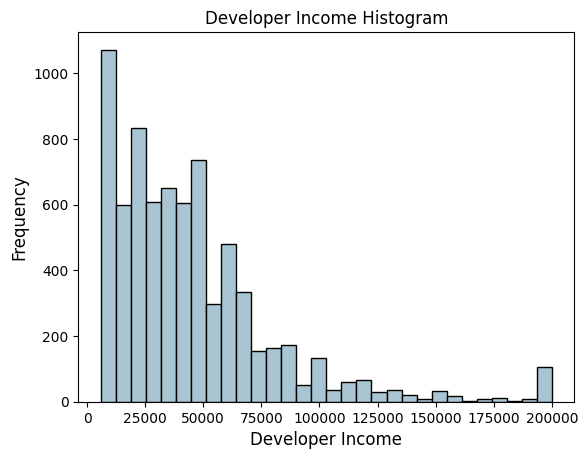

In [29]:
fig, ax = plt.subplots()
fcc['Income'].hist(bins = 30, color = '#A9C5D3', edgecolor = 'black', grid = False)
ax.set_title('Developer Income Histogram', fontsize = 12)
ax.set_xlabel('Developer Income', fontsize = 12)
ax.set_ylabel('Frequency', fontsize = 12)

The above distribution depicts a right skew in the income with lesser developers earning more money and vice versa. Let’s take a *4-Quantile* or a *quartile* based adaptive binning scheme. We can obtain the quartiles easily as follows.

In [31]:
quantile_list = [0, .25, .5, .75, 1.]
quantiles = fcc['Income'].quantile(quantile_list)
quantiles

0.00      6000.0
0.25     20000.0
0.50     37000.0
0.75     60000.0
1.00    200000.0
Name: Income, dtype: float64

Let’s now visualize these quantiles in the original distribution histogram!

Text(0, 0.5, 'Frequency')

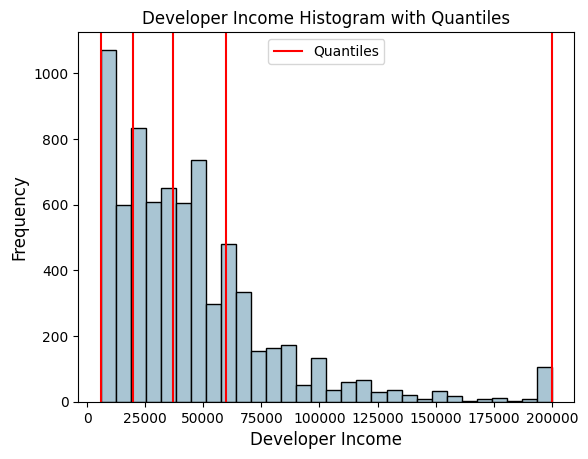

In [35]:
fig, ax = plt.subplots()
fcc['Income'].hist(bins = 30, color = '#A9C5D3', edgecolor = 'black', grid = False)
for quantile in quantiles:
    qvl = plt.axvline(quantile, color = 'r')
ax.legend([qvl], ['Quantiles'], fontsize = 10)
ax.set_title('Developer Income Histogram with Quantiles', fontsize = 12)
ax.set_xlabel('Developer Income', fontsize = 12)
ax.set_ylabel('Frequency', fontsize = 12)

The red lines in the distribution above depict the quartile values and our potential bins. Let’s now leverage this knowledge to build our quartile based binning scheme.

In [34]:
quantile_labels = ['0-25Q', '25-50Q', '50-75Q', '75-100Q']
fcc['Income_quantile_range'] = pd.qcut(fcc['Income'], q = quantile_list)
fcc['Income_quantile_label'] = pd.qcut(fcc['Income'], q = quantile_list, labels = quantile_labels)
fcc[['ID.x', 'Age', 'Income', 'Income_quantile_range', 'Income_quantile_label']].iloc[4:9]

,ID.x,Age,Income,Income_quantile_range,Income_quantile_label
4,9368291c93d5d5f5c8cdb1a575e18bec,20.0,6000.0,"(5999.999, 20000.0]",0-25Q
5,dd0e77eab9270e4b67c19b0d6bbf621b,34.0,40000.0,"(37000.0, 60000.0]",50-75Q
6,7599c0aa0419b59fd11ffede98a3665d,23.0,32000.0,"(20000.0, 37000.0]",25-50Q
7,6dff182db452487f07a47596f314bddc,35.0,40000.0,"(37000.0, 60000.0]",50-75Q
8,9dc233f8ed1c6eb2432672ab4bb39249,33.0,80000.0,"(60000.0, 200000.0]",75-100Q


This should give you a good idea of how quantile based adaptive binning works. An important point to remember here is that the resultant outcome of binning leads to discrete valued categorical features and you might need an additional step of feature engineering on the categorical data before using it in any model.

## Statistical Transformations

We talked about the adverse effects of skewed data distributions briefly earlier. Let’s look at a different strategy of feature engineering now by making use of statistical or mathematical transformations.We will look at the Log transform as well as the Box-Cox transform.

Both of these transform functions belong to the Power Transform family of functions, typically used to create monotonic data transformations. Their main significance is that they help in stabilizing variance, adhering closely to the normal distribution and making the data independent of the mean based on its distribution

## Log Transform

The log transform belongs to the power transform family of functions. This function can be mathematically represented as

$$y = log(x)$$

which reads as $\log$ of $x$ to the base $b$ is equal to $y$. This can be translate to:

$$x = b^y$$

which indicates as to what power must the base b be raised to in order to get $x$. The natural lograrithm uses $b = \exp$ where $e$ is the Euler’s number approximately equal to 2.718.

Log transforms are useful when applied to skewed distributions as they tend to expand the values which fall in the range of lower magnitudes and tend to compress or reduce the values which fall in the range of higher magnitudes. This tends to make the skewed distribution as normal-like as possible. Let’s use log transform on our developer Income feature which we used earlier.

In [36]:
fcc['Income_log'] = np.log((1+ fcc['Income']))
fcc[['ID.x', 'Age', 'Income', 'Income_log']].iloc[4:9]

,ID.x,Age,Income,Income_log
4,9368291c93d5d5f5c8cdb1a575e18bec,20.0,6000.0,8.699681
5,dd0e77eab9270e4b67c19b0d6bbf621b,34.0,40000.0,10.596660
6,7599c0aa0419b59fd11ffede98a3665d,23.0,32000.0,10.373522
7,6dff182db452487f07a47596f314bddc,35.0,40000.0,10.596660
8,9dc233f8ed1c6eb2432672ab4bb39249,33.0,80000.0,11.289794


The `Income_log` field depicts the transformed feature after log transformation. Let’s look at the data distribution on this transformed field now.

Text(11.5, 450, '$\\mu$=10.43')

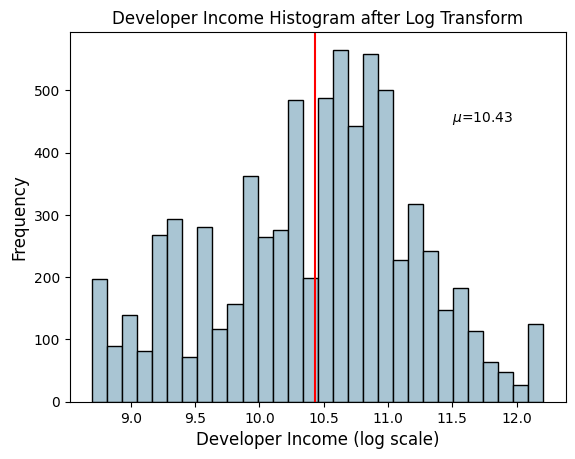

In [37]:
income_log_mean = np.round(np.mean(fcc['Income_log']), 2)
fig, ax = plt.subplots()
fcc['Income_log'].hist(bins = 30, color = '#A9C5D3', edgecolor = 'black', grid = False)
plt.axvline(income_log_mean, color='r')
ax.set_title('Developer Income Histogram after Log Transform', fontsize = 12)
ax.set_xlabel('Developer Income (log scale)', fontsize = 12)
ax.set_ylabel('Frequency', fontsize = 12)
ax.text(11.5, 450, r'$\mu$='+str(income_log_mean), fontsize = 10)

Based on the above plot, we can clearly see that the distribution is more normal-like or gaussian as compared to the skewed distribution on the original data.

## Box-Cox Transform

The Box-Cox transform is another popular function belonging to the power transform family of functions. This function has a pre-requisite that the numeric values to be transformed must be positive (similar to what log transform expects). In case they are negative, shifting using a constant value helps. Mathematically, the Box-Cox transform function can be denoted as follows.

$$ y = f(x, \lambda) = \begin{cases} \frac{x^\lambda - 1}{\lambda} & \text{if } \lambda \neq 0 \\ \log(x) & \text{if } \lambda = 0 \end{cases} $$

Such that the resulted transformed output y is a function of input x and the transformation parameter $\lambda$ such that when $\lambda = 0$, the resultant transform is the natural log transform which we discussed earlier. The optimal value of $\lambda$ is usually determined using a maximum likelihood or log-likelihood estimation.

Let’s now apply the Box-Cox transform on our developer income feature. First we get the optimal lambda value from the data distribution by removing the non-null values as follows.

In [38]:
income = np.array(fcc['Income'])
income_clean = income[~np.isnan(income)]
l, opt_lambda = spstats.boxcox(income_clean)
print('Optimal lambda value:', opt_lambda)

Optimal lambda value: 0.11799122709303277


Now that we have obtained the optimal λ value, let us use the Box-Cox transform for two values of $\lambda$ such that $\lambda = 0$ and $\lambda = \lambda$(optimal) and transform the developer `Income` feature.

In [39]:
fcc['Income_boxcox_lambda_0'] = spstats.boxcox((1 + fcc['Income']), lmbda = 0)
fcc['Income_boxcox_lambda_opt'] = spstats.boxcox(fcc['Income'], lmbda = opt_lambda)
fcc[['ID.x', 'Age', 'Income', 'Income_log', 'Income_boxcox_lambda_0', 'Income_boxcox_lambda_opt']].iloc[4:9]

,ID.x,Age,Income,Income_log,Income_boxcox_lambda_0,Income_boxcox_lambda_opt
4,9368291c93d5d5f5c8cdb1a575e18bec,20.0,6000.0,8.699681,8.699681,15.180667
5,dd0e77eab9270e4b67c19b0d6bbf621b,34.0,40000.0,10.596660,10.596660,21.115340
6,7599c0aa0419b59fd11ffede98a3665d,23.0,32000.0,10.373522,10.373522,20.346418
7,6dff182db452487f07a47596f314bddc,35.0,40000.0,10.596660,10.596660,21.115340
8,9dc233f8ed1c6eb2432672ab4bb39249,33.0,80000.0,11.289794,11.289794,23.637129


The transformed features are depicted in the above data frame. Just like we expected, `Income_log` and `Income_boxcox_lamba_0` have the same values. Let’s look at the distribution of the transformed `Income` feature after transforming with the optimal $\lambda$.

Text(24, 450, '$\\mu$=20.65')

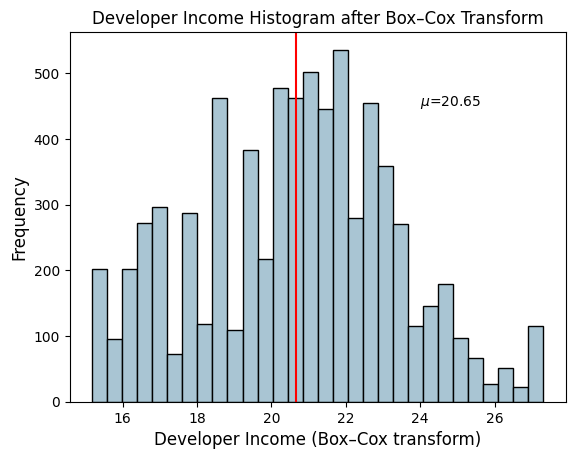

In [40]:
income_boxcox_mean = np.round(np.mean(fcc['Income_boxcox_lambda_opt']), 2)
fig, ax = plt.subplots()
fcc['Income_boxcox_lambda_opt'].hist(bins = 30, color='#A9C5D3', edgecolor = 'black', grid = False)
plt.axvline(income_boxcox_mean, color='r')
ax.set_title('Developer Income Histogram after Box–Cox Transform', fontsize = 12)
ax.set_xlabel('Developer Income (Box–Cox transform)', fontsize = 12)
ax.set_ylabel('Frequency', fontsize = 12)
ax.text(24, 450, r'$\mu$='+str(income_boxcox_mean), fontsize = 10)

The distribution looks more normal-like similar to what we obtained after the *log* transform.